<a href="https://colab.research.google.com/github/abaah17/Machine_Learning/blob/main/COVID-19_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pick relevant columns which can be appropiate features to identify a country according to it’s COVID-19 record.   [10]

 

2. Create clusters/classes of similar records using features selected in (1),  use an unsupervised learning algorithm of your choice.  [20]

 

3. Visualise the clusters using appropriate graphs.     [10]

 

4. Create a platform where new records of countries can be classified in the clusters in (2) [10] 



## ** ** the dataset given OxCGRT_latest-CAPABLE.csv do the following tasks: 

## 1. Pick relevant columns which can be appropiate features to identify a country according to it’s COVID-19 record.   [10]**  



In [ ]:
## Storing my dataset in a variable
dataset = "/content/drive/My Drive/Colab Notebooks/ML_Tatenda/OxCGRT_latest-CAPABLE - OxCGRT_latest-CAPABLE.csv"

In [ ]:
# importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA


In [ ]:
# Reading my dataset
df = pd.read_csv(dataset)
df.head()
df.describe()
df.head()
# list(df.columns)

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Selecting relevant features that identify a country according to it's covid-19 
# record

# dropping unwanted columns 
cols = ['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex',
       'EconomicSupportIndexForDisplay']


# for i in cols:
#   print(df[i])
#   print(df[i].unique())

cols_drop = []
for i in cols:
  # print(df[i])
  percent_missing = df[i].isnull().sum() * 100 / len(df)
  # finding columns that have nan greater or equal 60%
  if percent_missing >= 60: 
    # print(percent_missing)
    cols_drop.append(i)
    

cols_drop.append('CountryName')
cols_drop.append('CountryCode')
cols_drop.append('Date')
not_needed = [
              'StringencyIndexForDisplay',
              'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndexForDisplay',
               'ContainmentHealthIndexForDisplay','EconomicSupportIndexForDisplay'
             ]
for i in not_needed:
  cols_drop.append(i)
cols_drop

# dropping columnns not needed for our model
data_selected = df.drop(cols_drop, axis = 1)

cols = list(data_selected.columns)

cols


['C1_School closing',
 'C1_Flag',
 'C2_Workplace closing',
 'C2_Flag',
 'C3_Cancel public events',
 'C3_Flag',
 'C4_Restrictions on gatherings',
 'C4_Flag',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'E1_Income support',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H1_Flag',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'ConfirmedCases',
 'ConfirmedDeaths',
 'StringencyIndex',
 'StringencyLegacyIndex',
 'GovernmentResponseIndex',
 'ContainmentHealthIndex',
 'EconomicSupportIndex']


# **2. Create clusters/classes of similar records using features selected in (1),  use an unsupervised learning algorithm of your choice.  [20]**

In [ ]:
# Preprocessing my selected data before modeling

# filling the nan values with mean and mode based on the condition
for i in data_selected.columns:
  if data_selected[i].mean() < 3:
    data_selected[i].fillna(selected_features[i].mode()[0], inplace=True)
    data_selected[i].astype(int)
  else:
    data_selected[i].fillna(selected_features[i].mean(), inplace=True)


data_selected.head()
# cross-checking if there are still null values in my dataset
data_selected.describe()

data_selected

#Performing Feature Scaling on my selected data
standardScaler = MinMaxScaler()
columns_for_ft_scaling = cols 

#Applying the feature scaling operation on dataset using fit_transform() method
data_selected[columns_for_ft_scaling] = standardScaler.fit_transform(data_selected[columns_for_ft_scaling])

data_selected.columns
  

Index(['C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag',
       'C3_Cancel public events', 'C3_Flag', 'C4_Restrictions on gatherings',
       'C4_Flag', 'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyLegacyIndex', 'GovernmentResponseIndex',
       'ContainmentHealthIndex', 'EconomicSupportIndex'],
      dtype='object')

In [ ]:
# Employing K-means Unsupervised learning algorithm
model = KMeans(n_clusters=4)
model.fit(data_selected)

prediction = model.predict(data_selected)
prediction

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
# identifying the clusters
# clusters = model.cluster_centers_
# clusters

# y_km = model.fit_predict(data_selected)

# data_selected = np.array(data_selected) #that all

# plt.scatter(data_selected[y_km == 0,0], data_selected[y_km == 0,1], s=60, color='red')
# plt.scatter(data_selected[y_km == 1,0], data_selected[y_km == 1,1], s=60, color='blue')




# **3. Visualise the clusters using appropriate graphs.     [10]**

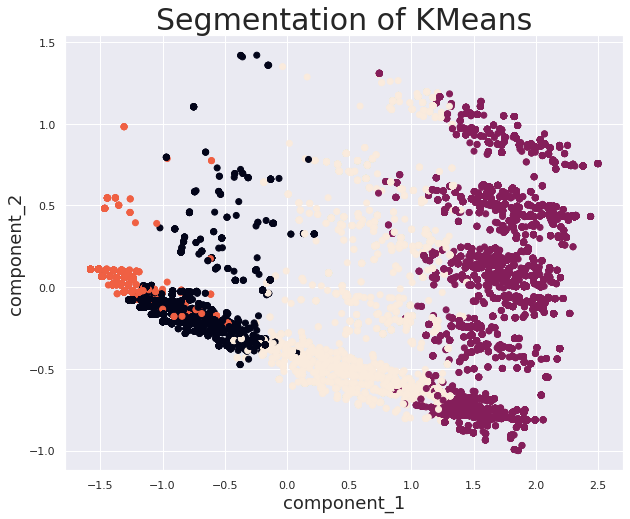

In [ ]:
# Employing PCA in visualization
pca = PCA(n_components=2).fit(data_selected)
pca_2d = pca.transform(data_selected)
plt.figure(figsize=(10,8))
plt.xlabel('component_1', fontsize=18)
plt.ylabel('component_2', fontsize=18)
plt.title('Segmentation of KMeans', fontsize=30)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=model.labels_)
plt.show()

# **4. Create a platform where new records of countries can be classified in the clusters in (2) [10]**

In [ ]:
#@title Please enter data to be predicted
C1_School_closing = 4 #@param {type:"slider", min:0, max:4, step:1}
C1_Flag= 0 #@param {type:"slider", min:0, max:1, step:1}
C2_Workplace_closing = 0 #@param {type:"slider", min:0, max:4, step:1}
C2_Flag =  0 #@param {type:"slider", min:0, max:2, step:1}
C3_Cancelpublicevents = 0 #@param {type:"slider", min:0, max:2, step:1}
C3_Flag= 0 #@param {type:"slider", min:0, max:1, step:1}
C4_Restrictionsongatherings= 0 #@param {type:"slider", min:0, max:5, step:1}
C4_Flag =  0  #@param {type:"slider", min:0, max:1, step:1}
C5_Closepublic= 0 #@param {type:"slider", min:0, max:3, step:1}
C6_Stay_at_homerequirements= 0 #@param {type:"slider", min:0, max:4, step:1}
C7_Restrictionsoninternal_movement = 0 #@param {type:"slider", min:0, max:3, step:1}
C8_International_travel_controls =  0 #@param {type:"slider", min:0, max:5, step:1}
E1_Income_support= 0 #@param {type:"slider", min:0, max:3, step:1}
E2_Debt_contractrelief= 0 #@param {type:"slider", min:0, max:1, step:1}

E3_Fiscalmeasures = 0 #@param {type:"slider", min:0, max:6616661, step:1}
E4_Internationalsupport = 0 #@param {type:"slider", min:0, max:5265523, step:1}

H1_Publicinformationcampaigns= 0 #@param {type:"slider", min:0, max:3, step:1} 
H1_Flag = 0 #@param {type:"slider", min:0, max:1, step:1}
H2_Testingpolicy =  3 #@param {type:"slider", min:0, max:3, step:1}
H3_Contacttracing = 2 #@param {type:"slider", min:0, max:2, step:1}

H4_Emergencyinvestmentinhealthcare = 2 #@param {type:"slider", min:0, max:55555, step:1}
H5_Investment_in_vaccines = 20 #@param {type:"slider", min:0, max:20, step:1}
ConfirmedCases = 6262 #@param {type:"slider", min:0, max:6262, step:1}
ConfirmedDeaths = 5659598459 #@param {type:"slider", min:0, max:5659598459, step:1}
StringencyIndex =  545 #@param {type:"slider", min:0, max:545, step:1}
ContainmentHealthIndex =  15296529 #@param {type:"slider", min:0, max:15296529, step:1}
StringencyLegacyIndex = 15296565 #@param {type:"slider", min:0, max:15296565, step:1}
GovernmentResponseIndex =  52223 #@param {type:"slider", min:0, max:52223, step:1}
ContainmentHealthIndex =  15296529 #@param {type:"slider", min:0, max:15296529, step:1}

EconomicSupportIndex = 48111 #@param {type:"slider", min:0, max:48111, step:1}


form_list = [
             C1_School_closing ,C1_Flag,C2_Workplace_closing,C2_Flag, 
             C3_Cancelpublicevents,C3_Flag,C4_Restrictionsongatherings,
             C4_Flag,C5_Closepublic,C6_Stay_at_homerequirements,C7_Restrictionsoninternal_movement,  
             C8_International_travel_controls,E1_Income_support,E2_Debt_contractrelief,
             E3_Fiscalmeasures ,E4_Internationalsupport,H1_Publicinformationcampaigns,
             H1_Flag,H2_Testingpolicy,H3_Contacttracing,H4_Emergencyinvestmentinhealthcare,
             H5_Investment_in_vaccines ,ConfirmedCases,ConfirmedDeaths,StringencyIndex,
             StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,
             EconomicSupportIndex
            ]
len(form_list)


# len(form_list) == len(['C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag',
#        'C3_Cancel public events', 'C3_Flag', 'C4_Restrictions on gatherings',
#        'C4_Flag', 'C5_Close public transport', 'C6_Stay at home requirements',
#        'C7_Restrictions on internal movement','C8_International travel controls', 'E1_Income support',
#        'E2_Debt/contract relief', 'E3_Fiscal measures',
#        'E4_International support', 'H1_Public information campaigns',
#        'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
#        'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
#        'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
#        'StringencyLegacyIndex', 'GovernmentResponseIndex',
#        'ContainmentHealthIndex', 'EconomicSupportIndex'])

form_data = pd.DataFrame([form_list],columns=data_selected.columns)
for i in form_data.columns:
  form_data[i].astype(int)


predict = model.predict(form_data)
print("The prediction is "+ str(predict[0]))


The prediction is 1
